## **Introducción a ANOVA**

- **¿Qué es ANOVA?**
  - ANalysis Of VAriance (ANOVA) es un método estadístico utilizado para comparar las medias de tres o más grupos.
  
- **Propósito de ANOVA:**
  - Determinar si existen diferencias estadísticamente significativas entre las medias de grupos independientes (no relacionados).
  
- **Cuándo Usar ANOVA:**
  - Al comparar los efectos de diferentes tratamientos o condiciones.
  - Al analizar datos con más de dos grupos.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuración de estilo y opciones
sns.set_style('darkgrid')
sns.set_palette('husl')
pd.set_option('display.max_rows', 100)
warnings.filterwarnings("ignore")


- **Bibliotecas Esenciales:**
  - `numpy` y `pandas`: Manipulación y análisis de datos.
  - `matplotlib` y `seaborn`: Visualización de datos.
  - `statsmodels` y `scipy`: Análisis estadístico.
  
- **Configuración:**
  - Establecer estilos visuales con `seaborn`.
  - Configurar opciones de visualización de pandas.
  - Suprimir advertencias para una salida más limpia.


# Carga y Exploración del Conjunto de Datos

In [2]:
# Cargar el conjunto de datos Iris
df_iris = sns.load_dataset('iris')

# Mostrar las primeras 10 filas del dataset
print("Primeras 10 filas del conjunto de datos Iris:")
display(df_iris.head(10))


Primeras 10 filas del conjunto de datos Iris:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
    # Calcular las medias de las características agrupadas por especie
print("Medias de las características por especie:")
display(df_iris.groupby('species').mean())


Medias de las características por especie:


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


- **Conjunto de Datos Utilizado:**
  - Conjunto de datos Iris, un dataset clásico en machine learning y estadística.
  
- **Exploración Inicial:**
  - Mostrar las primeras 10 filas para entender la estructura de los datos.
  - Calcular y mostrar los valores medios de las características agrupadas por especie.



## Distribución de los datos

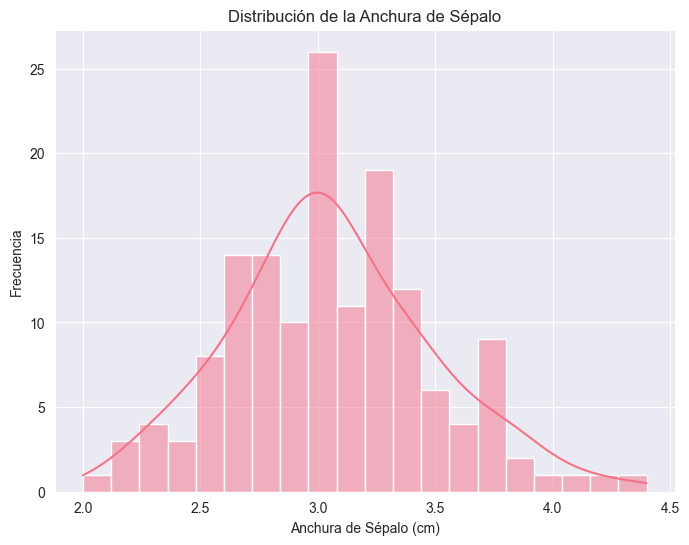

In [4]:
# Histograma de la anchura de sépalo
plt.figure(figsize=(8, 6))
sns.histplot(data=df_iris, x="sepal_width", kde=True, bins=20)
plt.title('Distribución de la Anchura de Sépalo')
plt.xlabel('Anchura de Sépalo (cm)')
plt.ylabel('Frecuencia')
plt.show()

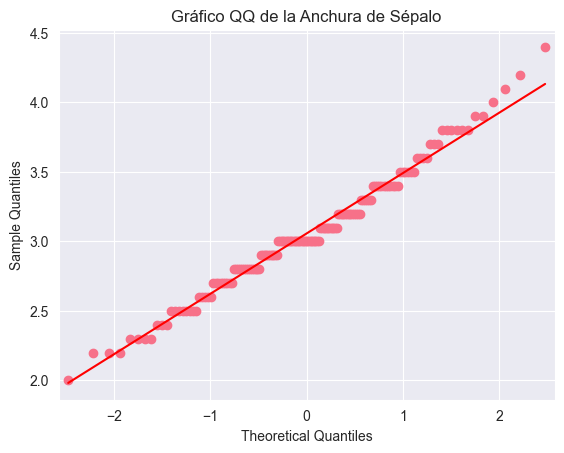

In [5]:
import statsmodels.api as sm

# Gráfico QQ para la anchura de sépalo
sm.qqplot(df_iris['sepal_width'], line='s')
plt.title('Gráfico QQ de la Anchura de Sépalo')
plt.show()


- **Histograma:**
  - Visualizar la distribución de la anchura de sépalo con KDE (Estimación de Densidad de Núcleo).
  
- **Gráfico QQ:**
  - Evaluar la normalidad de la distribución de la anchura de sépalo.


# Verificación de los supuestos de ANOVA. 

In [6]:
from scipy.stats import shapiro

# Aplicar la prueba de Shapiro-Wilk para normalidad
print("Prueba de Shapiro-Wilk para Normalidad:")
shapiro_test = shapiro(df_iris['sepal_width'])
print(f"Estadístico de prueba: {shapiro_test.statistic:.4f}")
print(f"Valor p: {shapiro_test.pvalue:.4f}")

# Interpretación
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print(f"Resultado: No se rechaza la hipótesis nula (p > {alpha}). Los datos siguen una distribución normal.\n")
else:
    print(f"Resultado: Se rechaza la hipótesis nula (p <= {alpha}). Los datos no siguen una distribución normal.\n")


Prueba de Shapiro-Wilk para Normalidad:
Estadístico de prueba: 0.9849
Valor p: 0.1012
Resultado: No se rechaza la hipótesis nula (p > 0.05). Los datos siguen una distribución normal.



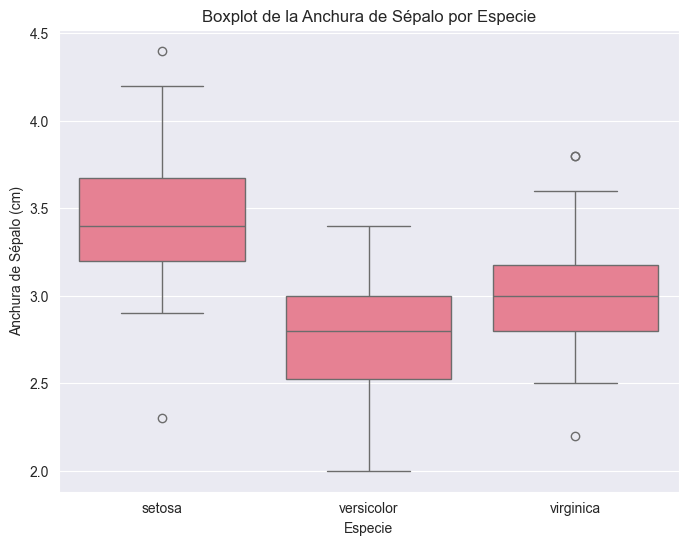

In [7]:
# Boxplot de la anchura de sépalo por especie
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_iris, x="species", y="sepal_width")
plt.title('Boxplot de la Anchura de Sépalo por Especie')
plt.xlabel('Especie')
plt.ylabel('Anchura de Sépalo (cm)')
plt.show()


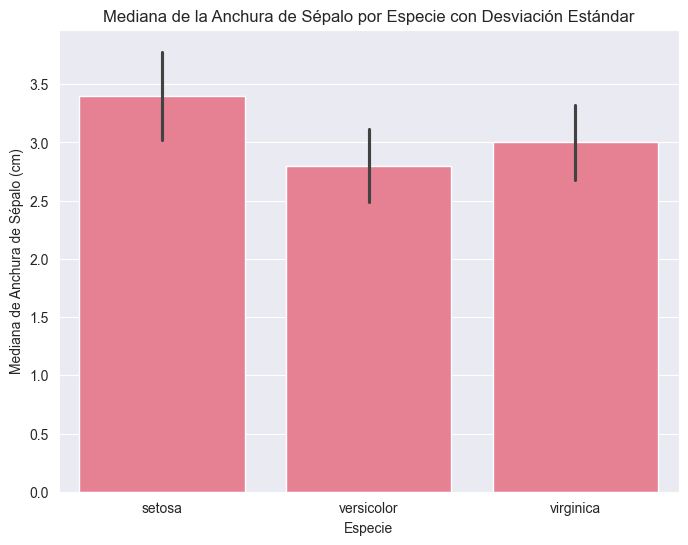

In [8]:
# Gráfico de barras de la mediana con desviaciones estándar
plt.figure(figsize=(8, 6))
sns.barplot(data=df_iris, x="species", y="sepal_width", estimator=np.median, ci='sd')
plt.title('Mediana de la Anchura de Sépalo por Especie con Desviación Estándar')
plt.xlabel('Especie')
plt.ylabel('Mediana de Anchura de Sépalo (cm)')
plt.show()


In [9]:
from scipy.stats import levene

# Agrupar los datos por especie
groups = [group["sepal_width"].values for name, group in df_iris.groupby("species")]

# Aplicar la prueba de Levene para homogeneidad de varianzas
levene_test = levene(*groups, center='median')
print("Prueba de Levene para Homogeneidad de Varianzas:")
print(f"Estadístico de prueba: {levene_test.statistic:.4f}")
print(f"Valor p: {levene_test.pvalue:.4f}")

# Interpretación
if levene_test.pvalue > alpha:
    print(f"Resultado: No se rechaza la hipótesis nula (p > {alpha}). Las varianzas son homogéneas.\n")
else:
    print(f"Resultado: Se rechaza la hipótesis nula (p <= {alpha}). Las varianzas no son homogéneas.\n")


Prueba de Levene para Homogeneidad de Varianzas:
Estadístico de prueba: 0.5902
Valor p: 0.5555
Resultado: No se rechaza la hipótesis nula (p > 0.05). Las varianzas son homogéneas.



- **Verificación de Normalidad:**
  - **Prueba de Shapiro-Wilk:**
    - Hipótesis Nula: Los datos siguen una distribución normal.
    - Interpretación basada en el valor p.
  
- **Homogeneidad de Varianzas:**
  - **Prueba de Levene:**
    - Hipótesis Nula: Las varianzas son iguales entre los grupos.
    - Interpretación basada en el valor p.

## **¡Momento Divertido!**

![ANOVA Divertido](https://media.giphy.com/media/3o7aD2saalBwwftBIY/giphy.gif)

**Pregunta 1:** ¿Cuál es el propósito principal de ANOVA?

- a) Comparar las medias de dos grupos
- b) Comparar las medias de tres o más grupos
- c) Evaluar la correlación entre variables

**Pregunta 2:** ¿Qué prueba se utiliza para verificar la normalidad en ANOVA?

- a) Prueba de Levene
- b) Prueba de Shapiro-Wilk
- c) Prueba de Tukey HSD


# ANOVA 

## **¿Por qué realizar ANOVA con SciPy y OLS? ¿Qué es el estadístico F y el ANOVA de una vía?**

ANOVA se puede realizar tanto con `scipy.stats` como con el modelo de Mínimos Cuadrados Ordinarios (OLS) de `statsmodels` debido a la flexibilidad y robustez que ofrecen estas herramientas para el análisis estadístico. **SciPy** proporciona funciones directas como `f_oneway` que facilitan la ejecución rápida de un ANOVA de una vía, ideal para comparaciones sencillas entre las medias de múltiples grupos sin necesidad de definir un modelo complejo. Por otro lado, **OLS** de `statsmodels` permite una mayor personalización y análisis detallado, incluyendo la generación de tablas ANOVA completas.


El **estadístico F** es una medida fundamental en ANOVA que compara la variabilidad entre los grupos con la variabilidad dentro de los grupos. Un valor alto de F indica que la variabilidad entre las medias de los grupos es mayor que la variabilidad dentro de los grupos, lo que sugiere diferencias significativas entre las medias.



In [10]:
from scipy.stats import f_oneway

# Aplicar ANOVA de una vía
f_value, p_value = f_oneway(*groups)
print("Resultados ANOVA (SciPy):")
print(f"Estadístico F: {f_value:.4f}")
print(f"Valor p: {p_value:.4f}")

# Interpretación
if p_value < alpha:
    print(f"Resultado: Se rechaza la hipótesis nula (p < {alpha}). Existen diferencias significativas entre las medias de las especies.\n")
else:
    print(f"Resultado: No se rechaza la hipótesis nula (p >= {alpha}). No existen diferencias significativas entre las medias de las especies.\n")


Resultados ANOVA (SciPy):
Estadístico F: 49.1600
Valor p: 0.0000
Resultado: Se rechaza la hipótesis nula (p < 0.05). Existen diferencias significativas entre las medias de las especies.



El **ANOVA de una vía** es una técnica estadística utilizada para determinar si existen diferencias significativas entre las medias de tres o más grupos independientes basándose en una única variable categórica. Se utiliza cuando se quiere comparar el efecto de una sola variable independiente en una variable dependiente continua. Por ejemplo, en el conjunto de datos Iris, un ANOVA de una vía permite evaluar si la anchura del sépalo difiere significativamente entre las diferentes especies de Iris. Este método es especialmente útil en estudios experimentales donde se desea analizar el impacto de diferentes tratamientos o condiciones sobre una respuesta particular.



In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Definir el modelo OLS
modelo = ols('sepal_width ~ C(species)', data=df_iris).fit()

# Aplicar ANOVA
anova_resultados = sm.stats.anova_lm(modelo, typ=2)
print("Tabla ANOVA (Statsmodels):")
display(anova_resultados)

# Resumen del modelo
print("Resumen del Modelo OLS:")
print(modelo.summary())


Tabla ANOVA (Statsmodels):


,sum_sq,df,F,PR(>F)
C(species),11.344933,2.0,49.16004,4.492017e-17
Residual,16.962000,147.0,NaN,NaN


Resumen del Modelo OLS:
                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     49.16
Date:                Thu, 03 Oct 2024   Prob (F-statistic):           4.49e-17
Time:                        01:13:59   Log-Likelihood:                -49.366
No. Observations:                 150   AIC:                             104.7
Df Residuals:                     147   BIC:                             113.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------


En este ejemplo:

C(species) le dice al modelo que "species" es una variable categórica.
El modelo crea automáticamente variables dummy para cada categoría de "species" (excepto una que se usa como referencia).
Esto permite comparar las medias de "sepal_width" entre las diferentes especies de Iris de manera adecuada.

## Explicación Corta 


1. **Estadístico F:** 49.16
2. **Valor p (PR(>F)):** 4.49e-17 (muy cercano a 0)
3. **Conclusión General:** Rechazamos la hipótesis nula

### **¿Qué Significan Estos Números?**

- **Estadístico F:** Este número nos indica cuánto varían las medias de los diferentes grupos en comparación con la variación dentro de cada grupo. Un valor alto de F, como 49.16, sugiere que hay diferencias significativas entre las medias de los grupos.

- **Valor p (PR(>F)):** Este valor nos dice la probabilidad de obtener un resultado tan extremo como el observado si **no** hubiera diferencias reales entre los grupos (es decir, si la hipótesis nula fuera cierta). Un valor p muy bajo, como 4.49e-17, significa que es extremadamente improbable que las diferencias observadas sean por casualidad.

## **Explicación larga de la Tabla ANOVA y sus Resultados** 🤓

La **Tabla ANOVA** generada por `statsmodels` proporciona un resumen de la variabilidad en los datos y ayuda a determinar si existen diferencias significativas entre los grupos comparados. A continuación, se detallan las métricas clave de la tabla y su interpretación:

| **sum_sq** | **df** | **F**      | **PR(>F)**         |
|------------|--------|------------|--------------------|
| C(species) | 11.344933 | 2.0    | 49.16004 | 4.492017e-17 |
| Residual   | 16.962000 | 147.0  | NaN      | NaN                |

### **Componentes de la Tabla ANOVA**

1. **sum_sq (Suma de Cuadrados):**
   - **C(species):** Representa la variabilidad explicada por las diferencias entre las especies de Iris. Un valor de 11.344933 indica la cantidad de variación en la anchura del sépalo atribuible a las diferencias entre las especies.
   - **Residual:** Representa la variabilidad no explicada por el modelo, es decir, la variación dentro de cada especie. Un valor de 16.962000 refleja la variabilidad residual en la anchura del sépalo.

2. **df (Grados de Libertad):**
   - **C(species):** Con 2 grados de libertad, corresponde al número de grupos menos uno (3 especies - 1 = 2).
   - **Residual:** Con 147 grados de libertad, se calcula como el número total de observaciones (150) menos el número de parámetros estimados (3: intercepto y dos coeficientes para las especies).

3. **F (Estadístico F):**
   - Un valor de **49.16004** para C(species) indica la razón de la variabilidad entre grupos sobre la variabilidad dentro de los grupos. Un valor alto de F sugiere que la variabilidad entre las especies es significativamente mayor que la variabilidad dentro de las especies.

4. **PR(>F) (Valor p):**
   - Un valor p de **4.492017e-17** es extremadamente bajo (cercano a cero), lo que indica que la probabilidad de observar un estadístico F tan alto como 49.16004 bajo la hipótesis nula (que no hay diferencias entre las medias de las especies) es prácticamente nula.

### **Interpretación de los Resultados**

- **Significancia Estadística:** Dado que el valor p (PR(>F)) es mucho menor que el nivel de significancia comúnmente utilizado (α = 0.05), se **rechaza la hipótesis nula**. Esto implica que **existen diferencias significativas en la anchura del sépalo entre al menos dos de las especies de Iris analizadas**.
  

# Pruebas POST-HOC

### **¿Qué es una Prueba Post-hoc?**

Después de realizar un **ANOVA** (Análisis de Varianza) y encontrar que hay diferencias significativas entre los grupos, **una prueba post-hoc** es un paso adicional que nos ayuda a **determinar exactamente entre cuáles grupos existen esas diferencias**.

### **Analogía Simple**

Imagina que tienes tres sabores de helado: **vainilla**, **chocolate** y **fresa**. Realizas una prueba para ver si al menos uno de estos sabores es preferido sobre los otros. El ANOVA te dice que **sí**, hay diferencias en las preferencias, pero no te dice **cuáles sabores** son los que difieren entre sí. Aquí es donde entra la prueba post-hoc: te dirá, por ejemplo, que **la gente prefiere más el chocolate sobre la vainilla** y **la vainilla sobre la fresa**, pero **no hay diferencia significativa entre chocolate y fresa**.

### **¿Por Qué Usamos Pruebas Post-hoc?**

1. **Identificar Diferencias Específicas:**
   - El ANOVA nos dice que hay al menos una diferencia, pero no especifica entre cuáles grupos. Las pruebas post-hoc detallan exactamente qué grupos difieren.

2. **Controlar el Error Tipo I:**
   - Cuando comparamos múltiples grupos, aumentamos la probabilidad de cometer un error tipo I (falsos positivos). Las pruebas post-hoc ajustan estos riesgos para mantener la precisión de los resultados.

3. **Facilitar la Toma de Decisiones:**
   - Saber exactamente qué grupos son diferentes ayuda a tomar decisiones informadas basadas en los datos, ya sea en investigación, negocios, salud, etc.


Resultados de la Prueba Post-hoc Tukey HSD:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
    setosa versicolor   -0.658    0.0 -0.8189 -0.4971   True
    setosa  virginica   -0.454    0.0 -0.6149 -0.2931   True
versicolor  virginica    0.204 0.0088  0.0431  0.3649   True
------------------------------------------------------------


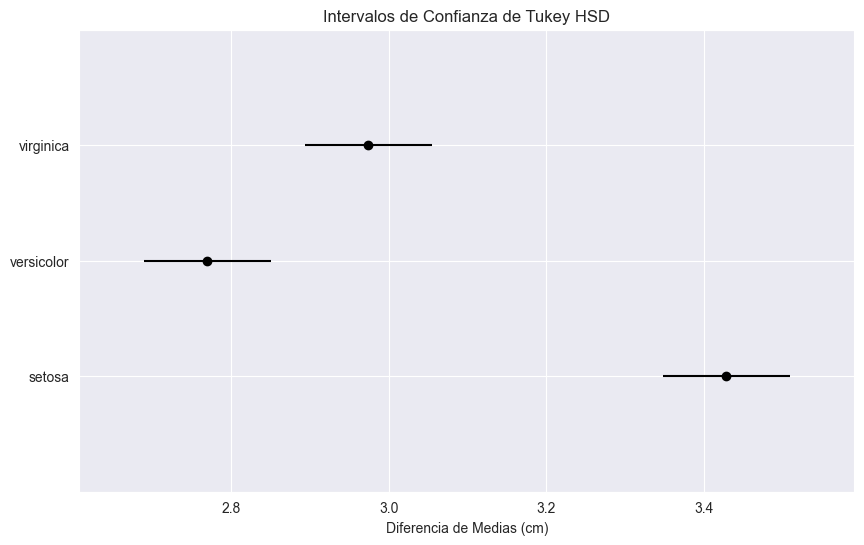

In [12]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Aplicar la prueba de Tukey HSD
tukey = pairwise_tukeyhsd(endog=df_iris['sepal_width'],
                          groups=df_iris['species'],
                          alpha=0.05)
print("Resultados de la Prueba Post-hoc Tukey HSD:")
print(tukey)

# Visualizar los resultados
tukey.plot_simultaneous(figsize=(10, 6))
plt.title("Intervalos de Confianza de Tukey HSD")
plt.xlabel('Diferencia de Medias (cm)')
plt.show()


**Prueba de Tukey HSD (Honest Significant Difference):**
- Es una de las pruebas post-hoc más utilizadas. Compara todas las posibles combinaciones de grupos para identificar cuáles difieren.

**p-adj (Valor p Ajustado):**
   - Es el valor p que ha sido ajustado para múltiples comparaciones, reduciendo el riesgo de errores tipo I (falsos positivos).
   - **Interpretación:**
     - **Valor p < 0.05:** La diferencia es **estadísticamente significativa**.
     - **Valor p ≥ 0.05:** La diferencia **no es estadísticamente significativa**.


In [13]:
# Convertir los resultados de Tukey a un DataFrame para una mejor visualización
tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])

print("Interpretación de la Prueba Post-hoc Tukey HSD:")
for index, row in tukey_df.iterrows():
    print(f"\nComparación: {row['group1']} vs {row['group2']}")
    print(f"Diferencia de Medias: {row['meandiff']:.4f} cm")
    print(f"Valor p ajustado: {row['p-adj']:.4f}")
    if row['reject']:
        print("Resultado: Rechazamos la hipótesis nula. Hay una diferencia significativa entre las dos especies.")
    else:
        print("Resultado: No rechazamos la hipótesis nula. No hay una diferencia significativa entre las dos especies.")


Interpretación de la Prueba Post-hoc Tukey HSD:

Comparación: setosa vs versicolor
Diferencia de Medias: -0.6580 cm
Valor p ajustado: 0.0000
Resultado: Rechazamos la hipótesis nula. Hay una diferencia significativa entre las dos especies.

Comparación: setosa vs virginica
Diferencia de Medias: -0.4540 cm
Valor p ajustado: 0.0000
Resultado: Rechazamos la hipótesis nula. Hay una diferencia significativa entre las dos especies.

Comparación: versicolor vs virginica
Diferencia de Medias: 0.2040 cm
Valor p ajustado: 0.0088
Resultado: Rechazamos la hipótesis nula. Hay una diferencia significativa entre las dos especies.


In [14]:
print("\n## Conclusiones\n")

# Interpretación del ANOVA
if p_value < alpha:
    print("1. **Resultados ANOVA**: Existe una diferencia estadísticamente significativa en la anchura de sépalo entre las diferentes especies de Iris (p < 0.05).")
else:
    print("1. **Resultados ANOVA**: No existe una diferencia estadísticamente significativa en la anchura de sépalo entre las diferentes especies de Iris (p >= 0.05).")

# Interpretación del Post-hoc
print("\n2. **Prueba Post-hoc Tukey HSD**:")
if tukey_df['reject'].any():
    print("   - Se encontraron diferencias significativas entre las siguientes parejas de especies:")
    for index, row in tukey_df.iterrows():
        if row['reject']:
            print(f"     - {row['group1']} vs {row['group2']}: Diferencia de medias = {row['meandiff']:.4f} cm (p-ajustado = {row['p-adj']:.4f})")
else:
    print("   - No se encontraron diferencias significativas entre ninguna de las parejas de especies.")



## Conclusiones

1. **Resultados ANOVA**: Existe una diferencia estadísticamente significativa en la anchura de sépalo entre las diferentes especies de Iris (p < 0.05).

2. **Prueba Post-hoc Tukey HSD**:
   - Se encontraron diferencias significativas entre las siguientes parejas de especies:
     - setosa vs versicolor: Diferencia de medias = -0.6580 cm (p-ajustado = 0.0000)
     - setosa vs virginica: Diferencia de medias = -0.4540 cm (p-ajustado = 0.0000)
     - versicolor vs virginica: Diferencia de medias = 0.2040 cm (p-ajustado = 0.0088)

3. **Implicaciones Prácticas**:
   - Las diferencias en la anchura de sépalo entre las especies de Iris pueden ser utilizadas para identificar y clasificar las especies de manera más efectiva.
   - Estos hallazgos pueden ser útiles en estudios botánicos, ecológicos y de agricultura para entender mejor las características morfológicas de las diferentes especies de Iris.



**Pregunta 1:** ¿Qué representa el estadístico F en ANOVA?

- a) La relación entre dos variables
- b) La razón de la variabilidad entre grupos sobre la variabilidad dentro de los grupos
- c) La mediana de los datos


---

**Pregunta 2:** En ANOVA, ¿qué indica un valor p menor a 0.05?

- a) No hay diferencias significativas entre las medias de los grupos
- b) Hay diferencias significativas entre las medias de los grupos
- c) Los datos no siguen una distribución normal


---

**Pregunta 3:** ¿Qué prueba post-hoc se utiliza para identificar qué grupos específicos difieren después de ANOVA?

- a) Prueba de Levene
- b) Prueba de Shapiro-Wilk
- c) Prueba de Tukey HSD




Explicación Paso a Paso
Importación de Bibliotecas: Se importan las bibliotecas necesarias para el análisis, visualización y manejo de datos.

Carga de Datos: Se carga el conjunto de datos Iris utilizando seaborn.

Exploración de Datos (EDA):

Estadísticas Descriptivas: Se calculan las medias de las características agrupadas por especie para obtener una visión general.
Visualizaciones: Se utilizan histogramas, gráficos QQ, boxplots y gráficos de barras para visualizar la distribución y las diferencias entre especies.
Verificación de Supuestos de ANOVA:

Normalidad: Se aplica la prueba de Shapiro-Wilk para verificar si la anchura de sépalo sigue una distribución normal.
Homogeneidad de Varianzas: Se utiliza la prueba de Levene para comprobar si las varianzas son homogéneas entre las especies.
Aplicación del ANOVA:

ANOVA con SciPy: Se realiza una prueba ANOVA de una vía para determinar si hay diferencias significativas entre las medias de las especies.
ANOVA con Statsmodels: Se define un modelo OLS y se obtiene una tabla ANOVA detallada.
Prueba Post-hoc Tukey HSD: Dado que el ANOVA indicó diferencias significativas, se realiza una prueba post-hoc para identificar entre cuáles especies existen estas diferencias.

Interpretación de Resultados: Se interpretan tanto los resultados del ANOVA como los de la prueba post-hoc para extraer conclusiones significativas.

Conclusiones: Se resumen los hallazgos y se discuten las implicaciones prácticas de los resultados obtenidos.

Notas Adicionales
Supuestos de ANOVA: Es fundamental verificar que los datos cumplan con los supuestos de normalidad y homogeneidad de varianzas para garantizar la validez de los resultados del ANOVA.

Pruebas Post-hoc: Si el ANOVA no muestra diferencias significativas, las pruebas post-hoc no son necesarias. Sin embargo, si se detectan diferencias significativas, las pruebas post-hoc ayudan a identificar específicamente dónde se encuentran estas diferencias.

Visualizaciones: Complementar el análisis estadístico con visualizaciones facilita la interpretación y comunicación de los resultados.

Interpretación en Contexto: Siempre es importante interpretar los resultados en el contexto del estudio y considerar las implicaciones prácticas de los hallazgos.